<a href="https://colab.research.google.com/github/XTR2k4/Marketing-Campaign-Analysis/blob/main/Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Problem**
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertisisng campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

\
### **Research Question**
Which ad platform is more effective in terms of conversions, clicks and overall cost-effectiveness?

## **Data Description**

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

\
Key features include:
*   **Date**: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
*   **Ad Views:** The number of times the ad was viewed.
*   **Ad Clicks**: The number of clicks received on the ad.
*   **Ad Conversions**: The number of conversions resulting from the ad.
*   **Cost per Ad**: The cost associated with running the Facebook ad campaign.
*   **Click-Through Rate (CTR)**: The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
*   **Conversion Rate**: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
*   **Cost per Click (CPC)**: The average cost incurred per click on the ad.

In [72]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [73]:
# loading the datset
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')

# data overview
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [74]:
# no. of rows and columns
df.shape

(365, 17)

In [75]:
# checking the datatypes of the columns
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [76]:
# converting the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
#descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


## Comparing the performance of the campaigns

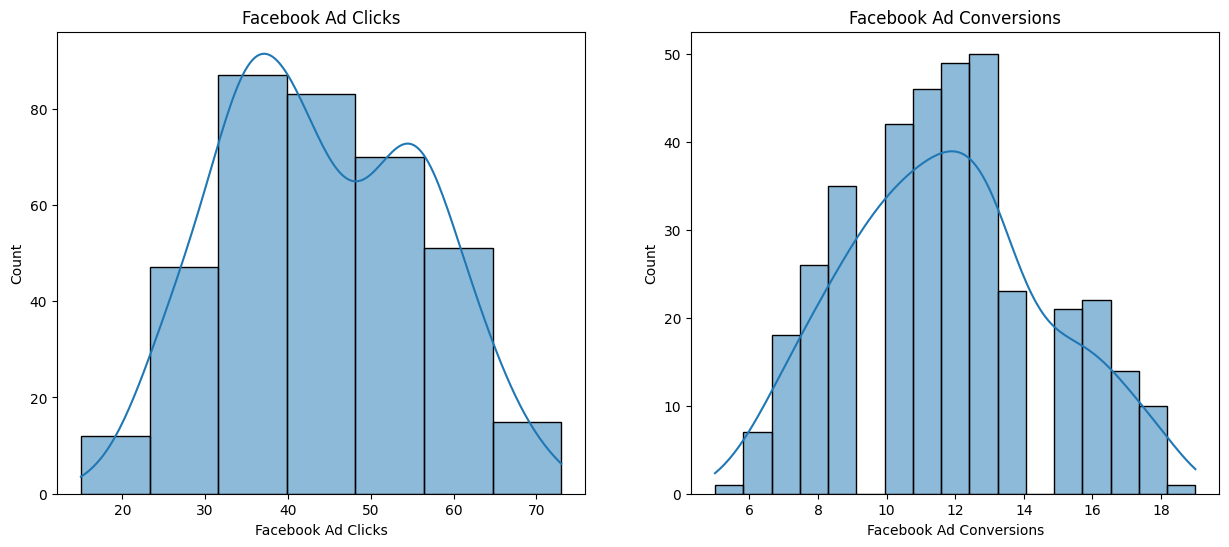

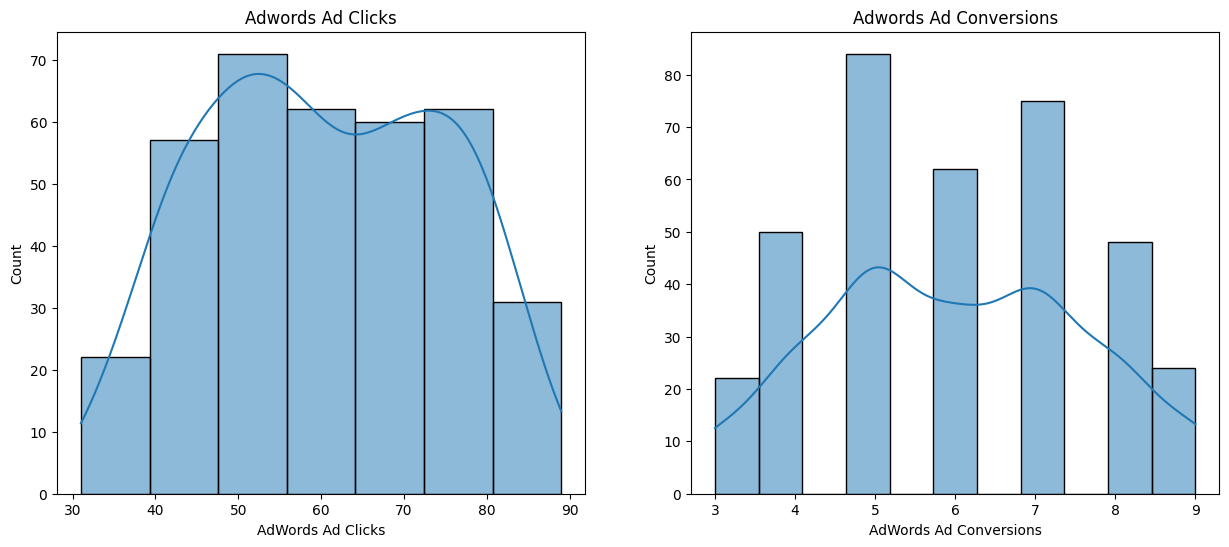

In [78]:
# distribution of clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adwords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, kde = True)
plt.subplot(1,2,2)
plt.title('Adwords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], kde = True)
plt.show()

The histograms are showing somewhat symmetrical shape, which tells us that the distribution is normally distributed. This symmetrical shape suggests that the no.of clicks and conversions is relatively evenly distributed. Meaning there are not many clicks or conversions that are outliers.
( We can see that from the descriptive statistics of columns - Facebook Ad Clicks,	Facebook Ad Conversions,	AdWords Ad Clicks,	AdWords Ad Conversions mean and median more or less the same )

#### How frequently do we observe days with high number of conversions comapred to days with low number of conversions?

In [79]:
# function to calculate categories of conversions
def conversion_category(conversion_col):
  category = []
  for conversion in df[conversion_col]:
    if conversion < 6:
      category.append('less than 6')
    elif 6 <= conversion < 11:
      category.append('6 - 10')
    elif 11 <= conversion < 16:
      category.append('10 - 16')
    else:
      category.append('more than 15')
  return category

# applying function on both campaign's conversion
df['Facebook Conversion Category'] = conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = conversion_category('AdWords Ad Conversions')

In [80]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 16,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [81]:
df['Facebook Conversion Category'].value_counts()

,count
Facebook Conversion Category,
10 - 16,189
6 - 10,128
more than 15,47
less than 6,1


In [82]:
df['AdWords Conversion Category'].value_counts()

,count
AdWords Conversion Category,
6 - 10,209
less than 6,156


In [83]:
pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()

,Facebook Conversion Category,count
0,10 - 16,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [84]:
fb = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category': 'Category'})

In [85]:
pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index()

,AdWords Conversion Category,count
0,6 - 10,209
1,less than 6,156


In [86]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns={'AdWords Conversion Category': 'Category'})

In [87]:
# making the separate dataframe on category for both campaigns
category_df = pd.merge(fb, adwords, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 16,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [88]:
category_df.rename(columns={'count_x' : 'Facebook', 'count_y': 'AdWords'}, inplace=True)
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,Facebook,AdWords
2,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 16,189,0.0
3,more than 15,47,0.0


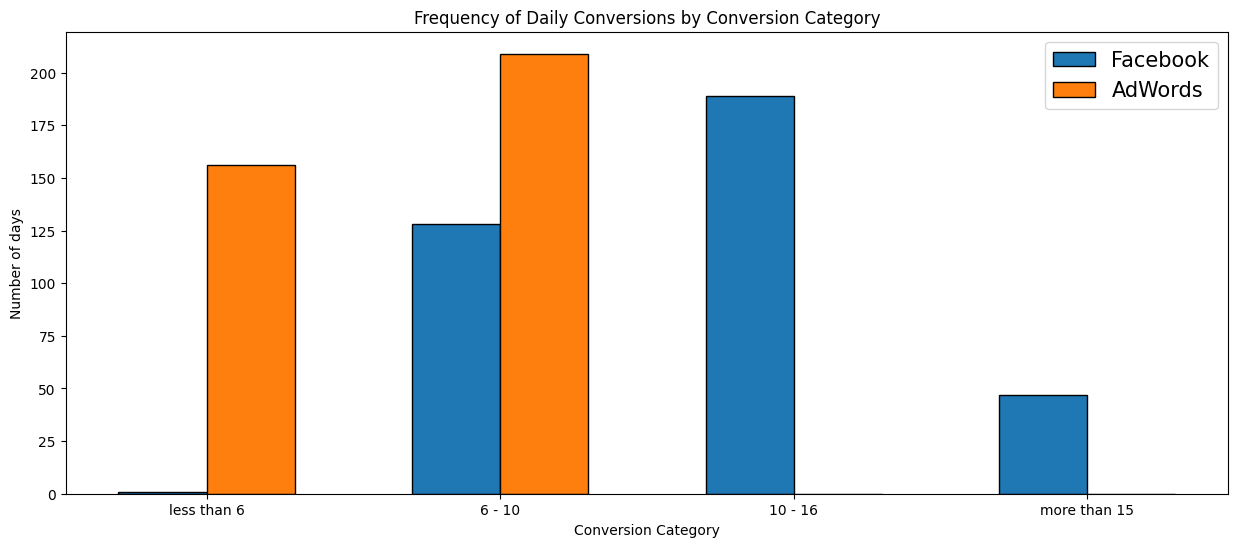

In [89]:
# Bar width and x locations
w, x = 0.3, np.arange(len(category_df))

plt.figure(figsize=(15,6))
plt.bar(x - w/2, category_df['Facebook'], width=w, edgecolor = 'k')
plt.bar(x + w/2, category_df['AdWords'], width=w, edgecolor = 'k')

plt.xticks(x, category_df['Category'])
plt.title('Frequency of Daily Conversions by Conversion Category')
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.legend(fontsize = 15, labels = ['Facebook', 'AdWords'])
plt.show()

*   The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
*   There is a significant variance in the number of high-conversion days between two different campaigns.
*   The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

Do more clicks on the ad really lead to more sales?

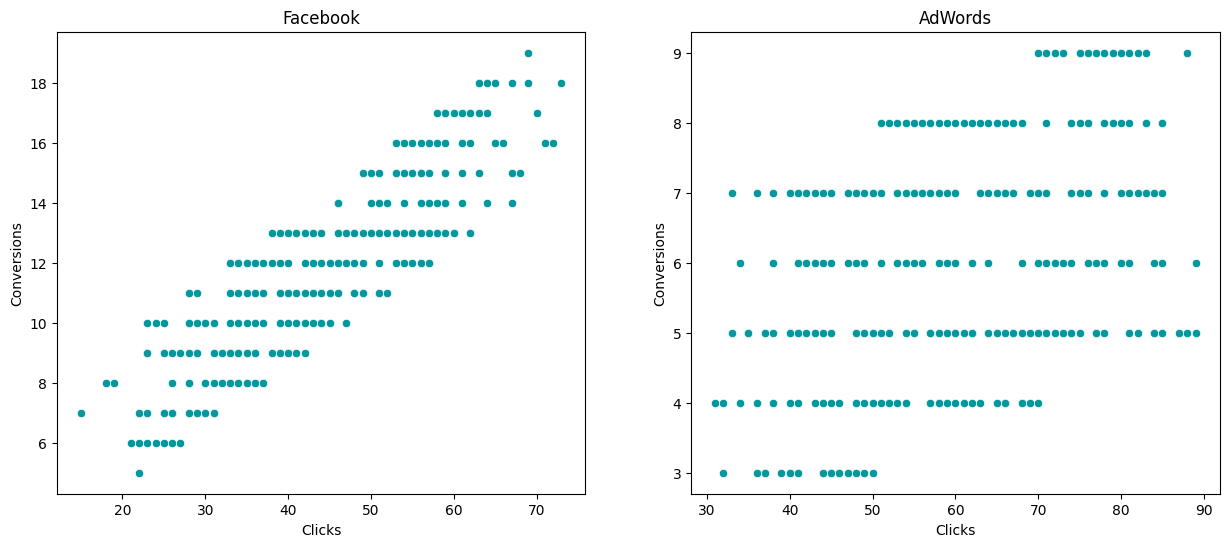

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'], y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [91]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()

print('Ad Conversions vs Ad Clicks Correlation\n----------------------------------------')
print(f'Facebook : {round(facebook_corr.values[0,1],2)}')
print(f'AdWords : {round(adwords_corr.values[0,1],2)}')

Ad Conversions vs Ad Clicks Correlation
----------------------------------------
Facebook : 0.87
AdWords : 0.45


*   A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.

*   This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.

*   The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

*   A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.

*   The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

## **Hypothesis Testing**
**Hypothesis**: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0)**: There is no significant difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

> H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1)**: The number of conversions from Facebook is greater than the number of conversions from AdWords.

> H1: µ_Facebook > µ_AdWords

In [92]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\n T statistic', t_stats, '\n p-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\n p-value is less than significance value, Reject the null hypothesis")
else:
    print("\n p-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

 T statistic 32.88402060758184 
 p-value 9.348918164530465e-134

 p-value is less than significance value, Reject the null hypothesis


*   The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

*   The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

*   The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

*   The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

*   Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

*   Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

## **Regression Analysis**

What will happen when I do go with the Facebook Ad?

How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [93]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


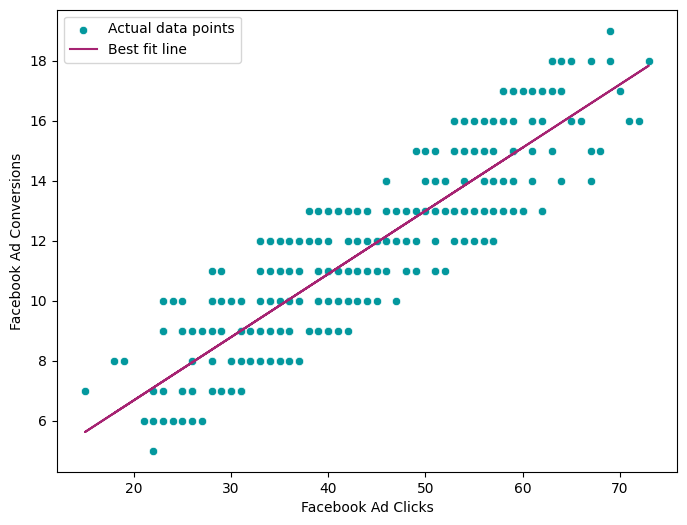

In [113]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [95]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


* The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

* With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

* For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

## Analyzing Facebook Campaign metrics over time

In [103]:
# cleaning data (removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [112]:
df.dtypes

,0
Date,datetime64[ns]
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,float64
Facebook Click-Through Rate (Clicks / View),float64
Facebook Conversion Rate (Conversions / Clicks),float64
Facebook Cost per Click (Ad Cost / Clicks),float64
month,int32
week,int32


In [104]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


At what times of the month or days of the week do we observe the conversions?

In [105]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

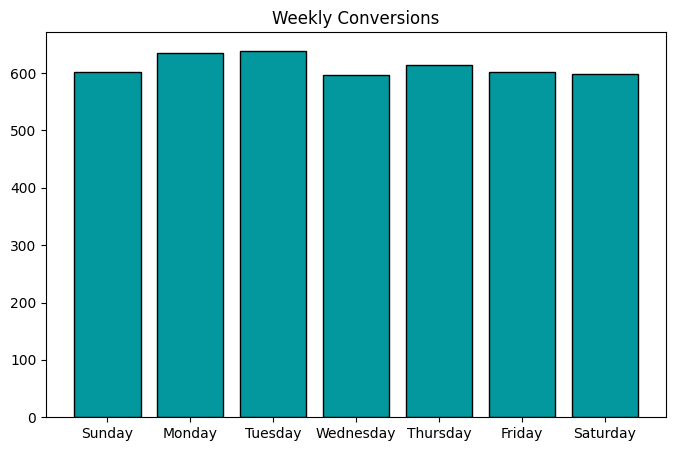

In [114]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

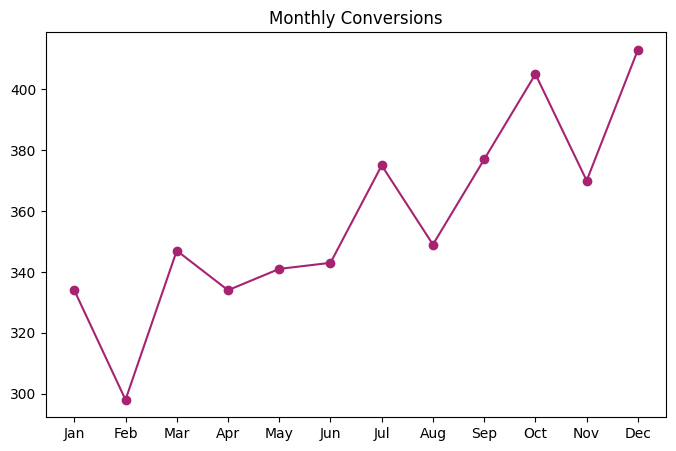

In [107]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

* Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.

* Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

## How does the Cost Per Conversion (CPC) trend over time?
Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

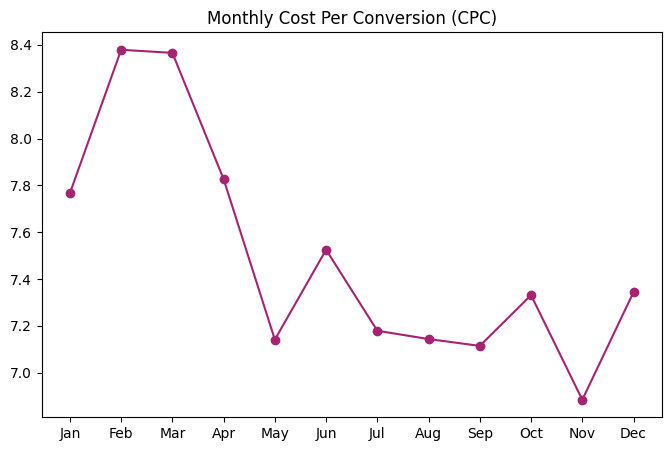

In [108]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

* The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.

* May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.

* February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.

* Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.

* Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [109]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\n p-value is less than significance value, Reject the null hypothesis")
else:
    print("\n p-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


* Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

* Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.